In [32]:
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
max([max(sequence) for sequence in train_data])

9999

### Decoding one of the Reviews to English

In [7]:
# Reverse word index mapping
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
#reverse_word_index = {index + 3: word for word, index in word_index.items()}

# Choose a review to decode
review_index = 0
review = train_data[review_index]

# Decode the review
decoded_review = ' '.join(reverse_word_index.get(index - 3, '?') for index in review)

# Print the decoded review
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
#same things in another way
word_index = imdb.get_word_index()
reverse_word_index = dict(
                           [(value, key) for (key, value) in word_index.items()] 
                            )
# Decode the review
decoded_review = ' '.join(reverse_word_index.get(index - 3, '?') for index in train_data[15])

# Print the decoded review
print(decoded_review)

? a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh ? like character with wall to wall hot babes and mix in a ? and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily ? compound the plot was somewhere between preposterous and non existent how many ? are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become ? through ? responsibility this was written for ? males it plays like a video game i did enjoy the ? ii landing in the desert though


### Encoding

In [9]:
import numpy as np

In [10]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train.shape

(25000, 10000)

In [13]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
x_test.shape

(25000, 10000)

In [15]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
# Vectorizing the labels also
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Building a NN Model

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [20]:
model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
# from keras import optimizers
# from keras import metrics
# from keras import losses

# model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=[mertrics.binary_accuracy])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

x_val.shape

(10000, 10000)

In [26]:
y_val = y_train[:10000]
partial_y_train= y_train[10000:]

y_val.shape

(10000,)

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5446 - accuracy: 0.7731 - val_loss: 0.4223 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3470 - accuracy: 0.8906 - val_loss: 0.3295 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2572 - accuracy: 0.9181 - val_loss: 0.2907 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2075 - accuracy: 0.9313 - val_loss: 0.2772 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1738 - accuracy: 0.9427 - val_loss: 0.2767 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1470 - accuracy: 0.9547 - val_loss: 0.2803 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1269 - accuracy: 0.9597 - val_loss: 0.2921 - val_accuracy: 0.8834
Epoch 8/20
30

#### The fit() function returns a History object (history in this case), which contains information about the training process, such as the loss and accuracy values at each epoch. This object can be used to analyze and visualize the training history.

In [28]:
history_dict = history.history

In [29]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training loss and validation loss

In [33]:
loss_values = history_dict['loss']

In [34]:
val_loss_values = history_dict['val_loss']

In [37]:
acc = history_dict['val_accuracy']

In [39]:
epochs = range(1, len(acc)+1)

In [40]:
epochs

range(1, 21)

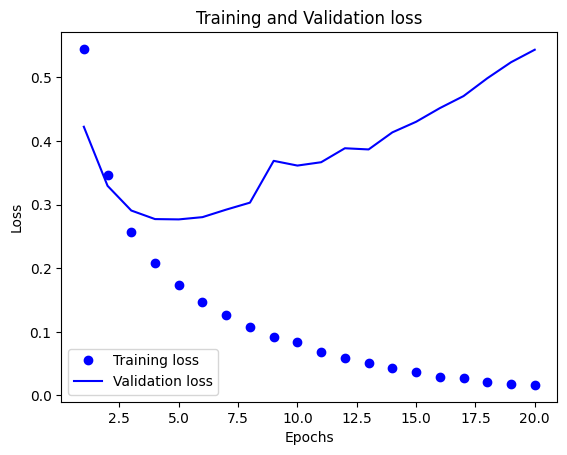

In [41]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Training Accuracy vs Validation Accuracy

In [42]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [44]:
train_acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

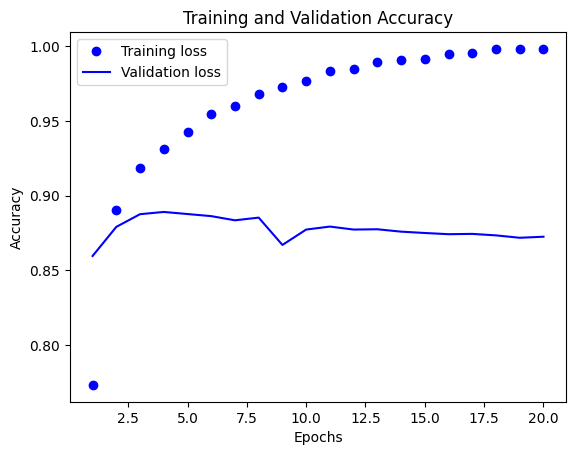

In [45]:
plt.plot(epochs, train_acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Retraining a Model from Scratch

In [46]:
model2 = models.Sequential()

In [47]:
model2.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation ='relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [49]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model2.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4404 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2599 - accuracy: 0.9051
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2089 - accuracy: 0.9219
Epoch 4/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1760 - accuracy: 0.9364


In [51]:
results= model2.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2885 - accuracy: 0.8858


In [53]:
results #Loos & accuracy of Model2

[0.2884836196899414, 0.8858399987220764]

In [55]:
model2.predict(x_test) #Likelihood of reviews being Positive or Negative

782/782 [==============================] - 1s 1ms/step


array([[0.18771556],
       [0.99977136],
       [0.6192866 ],
       ...,
       [0.08901893],
       [0.0680343 ],
       [0.6013693 ]], dtype=float32)

### Build the model using 3 hidden layers

In [59]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation ='relu'))
model3.add(layers.Dense(16, activation ='relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [60]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model3.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4914 - accuracy: 0.8051
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2149 - accuracy: 0.9210
Epoch 4/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1805 - accuracy: 0.9339


In [65]:
results= model3.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8845


In [66]:
results

[0.2937372326850891, 0.8844799995422363]

### Let's use different activation functions

In [64]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
model4.add(layers.Dense(16, activation ='tanh'))
model4.add(layers.Dense(1, activation = 'sigmoid'))

In [67]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4428 - accuracy: 0.8214
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2547 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1987 - accuracy: 0.9243
Epoch 4/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1651 - accuracy: 0.9405


In [85]:
results= model4.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.3037 - accuracy: 0.8805


[0.30372920632362366, 0.8804799914360046]

### Using mse as loss function

In [102]:
model5 = models.Sequential()
model5.add(layers.Dense(32, activation = 'tanh', input_shape=(10000,)))
model5.add(layers.Dense(32, activation ='tanh'))
model5.add(layers.Dense(1, activation = 'sigmoid'))

In [114]:
from keras import optimizers

model5.compile(optimizer=optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.0152 - accuracy: 0.9979 - val_loss: 0.5177 - val_accuracy: 0.8734
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.0151 - accuracy: 0.9979 - val_loss: 0.5187 - val_accuracy: 0.8734
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.0149 - accuracy: 0.9979 - val_loss: 0.5192 - val_accuracy: 0.8720
Epoch 4/4
30/30 [==============================] - 0s 12ms/step - loss: 0.0148 - accuracy: 0.9980 - val_loss: 0.5204 - val_accuracy: 0.8732


In [115]:
results= model5.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.8607


[0.5689814686775208, 0.8606799840927124]